# SALES PREDICTION USING PYTHON
Sales prediction means predicting how much of a product people will buy based on factors such as the amount you spend to advertise your product, the segment of people you advertise for, or the platform you are advertising on about your product. Typically, business always need their Data Scientist to predict their future sales with every step they take to manipulate the cost of advertising their product. So lets start the task of sales prediction with machine learning using Python.


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [29]:
df = pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [30]:
main_df = df.drop('Unnamed: 0', axis =1)
main_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [31]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### Categorical Features:
- TV
- Radio
- Newspaper
- Sales

In [32]:
main_df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [33]:
main_df.shape

(200, 4)

# Data Analysis

In [34]:
main_df.describe

<bound method NDFrame.describe of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]>

# Numerical features

In [35]:
sns.set

<function seaborn.rcmod.set(*args, **kwargs)>

C:\Users\shahd\AppData\Local\Temp\ipykernel_3380\1714843590.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(main_df['TV'])


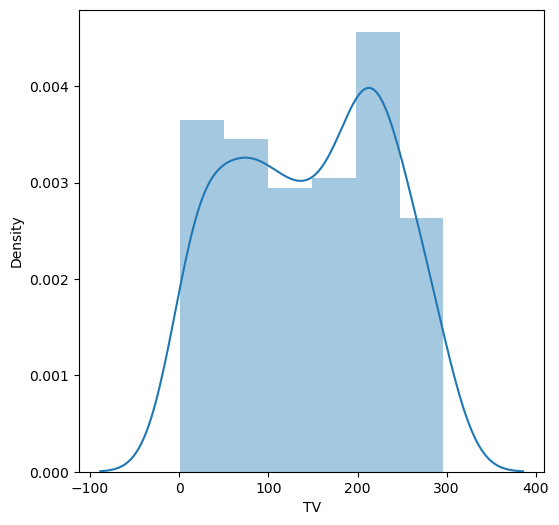

In [36]:
# TV
plt.figure(figsize=(6,6))
sns.distplot(main_df['TV'])
plt.show()

C:\Users\shahd\AppData\Local\Temp\ipykernel_3380\2838991159.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(main_df['Radio'])


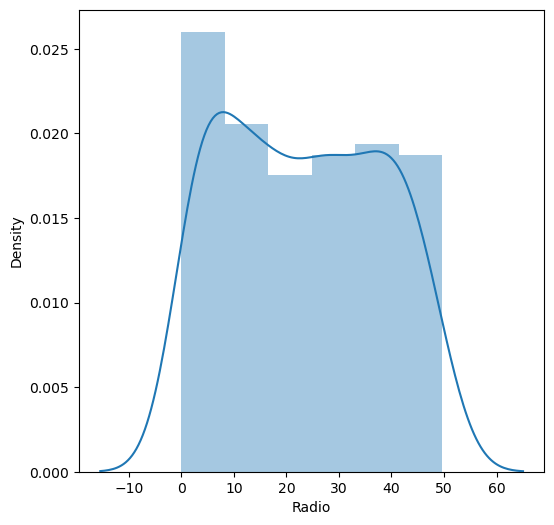

In [37]:
# Radio
plt.figure(figsize=(6,6))
sns.distplot(main_df['Radio'])
plt.show()

C:\Users\shahd\AppData\Local\Temp\ipykernel_3380\339488639.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(main_df['Newspaper'])


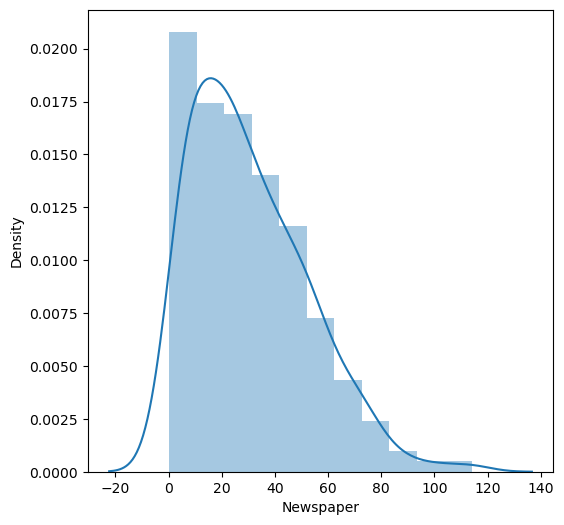

In [38]:
# Newspaper
plt.figure(figsize=(6,6))
sns.distplot(main_df['Newspaper'])
plt.show()

C:\Users\shahd\AppData\Local\Temp\ipykernel_3380\3013543255.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(main_df['Sales'])


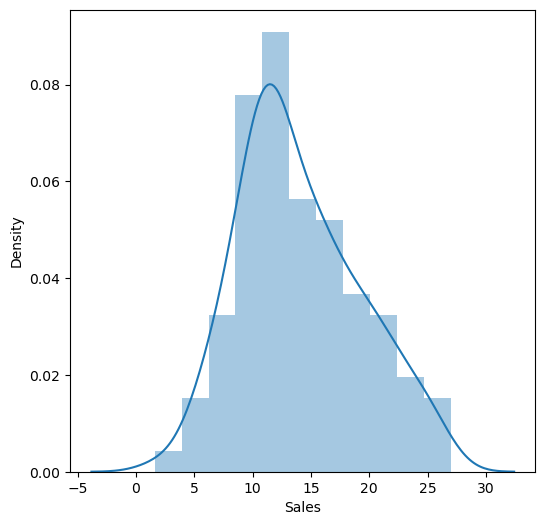

In [39]:
# Sales
plt.figure(figsize=(6,6))
sns.distplot(main_df['Sales'])
plt.show()

# Categorical Features

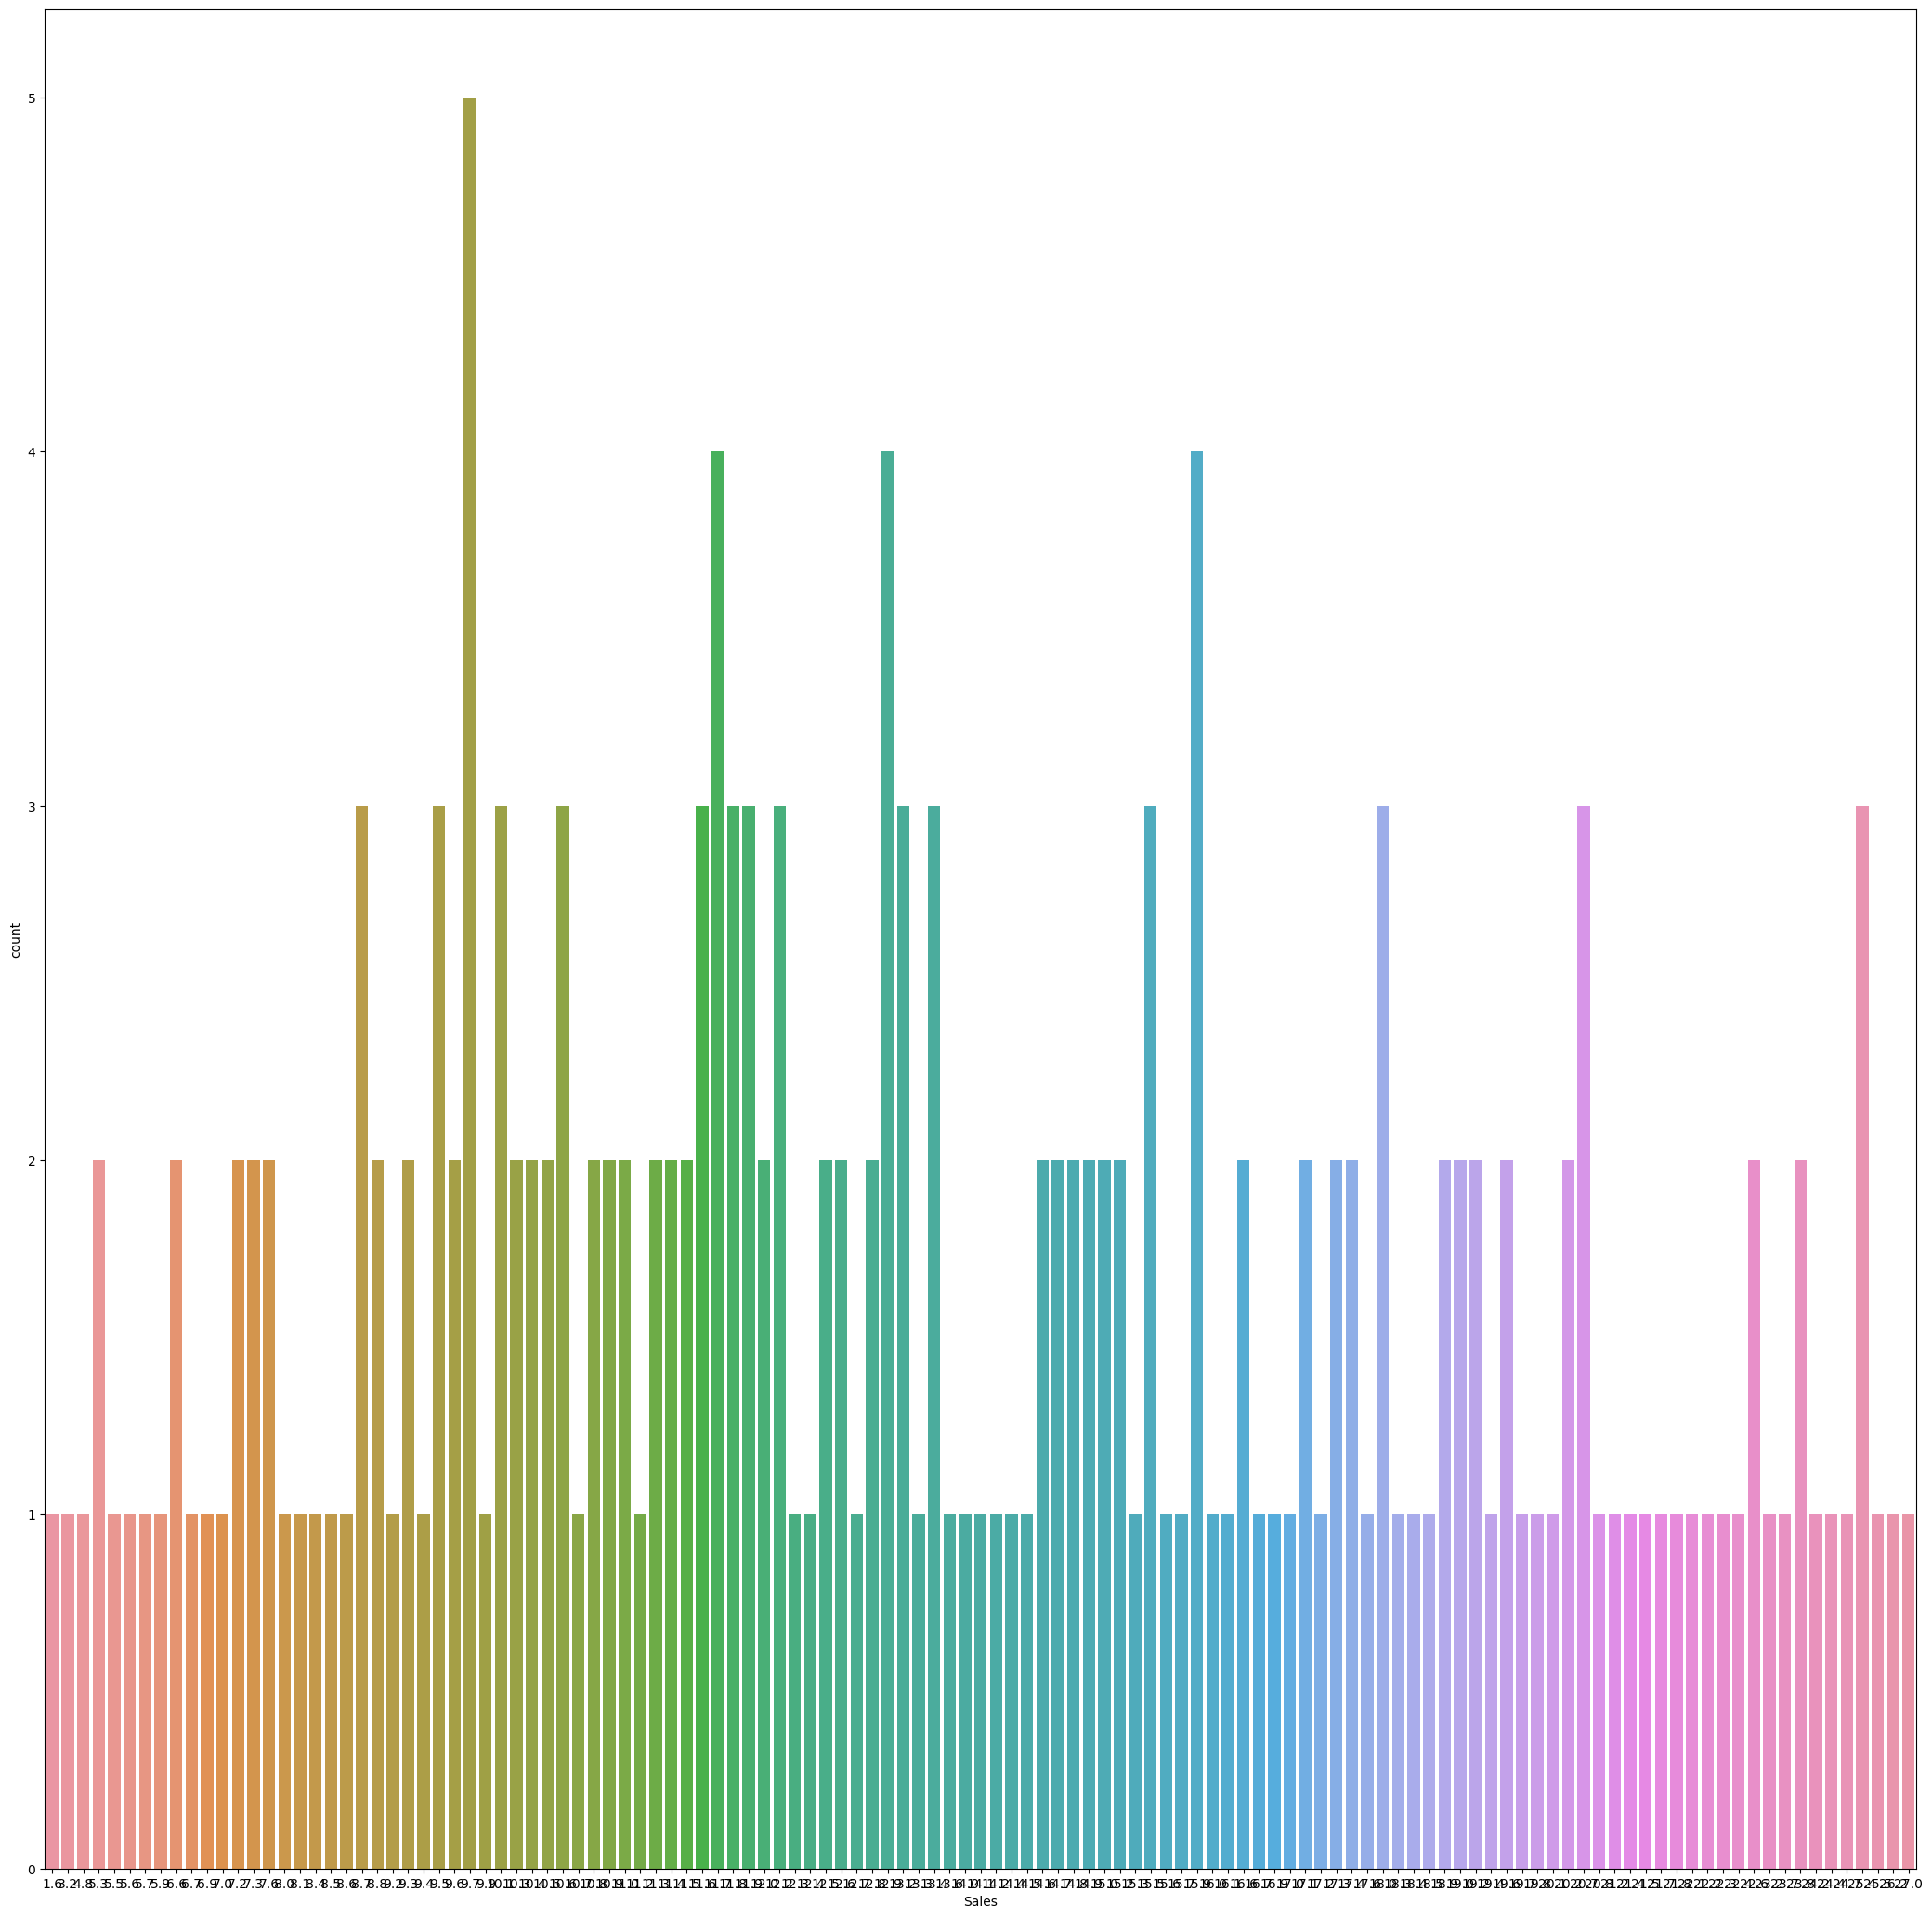

In [40]:
# Sales
plt.figure(figsize=(26,26))
sns.countplot(x='Sales', data=main_df)
plt.show()

# EDA

In [41]:
import seaborn as sns 

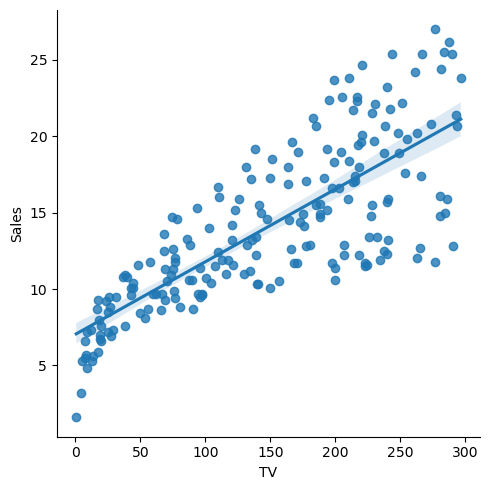

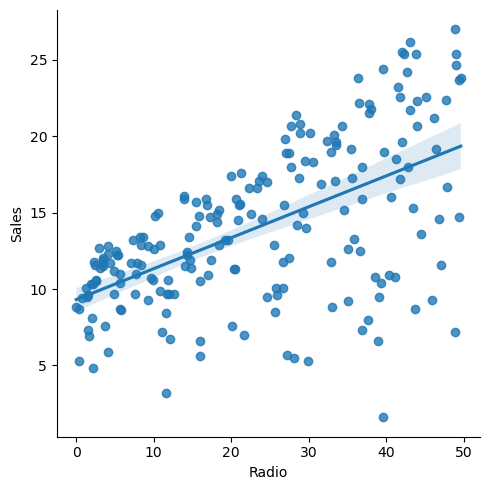

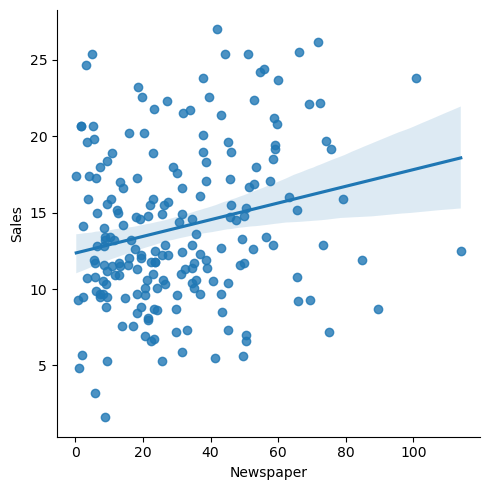

In [42]:
sns.lmplot(x='TV', y='Sales', data=main_df)
sns.lmplot(x='Radio', y='Sales', data=main_df)
sns.lmplot(x='Newspaper',y= 'Sales', data=main_df)

In [43]:
import matplotlib.pyplot as plt

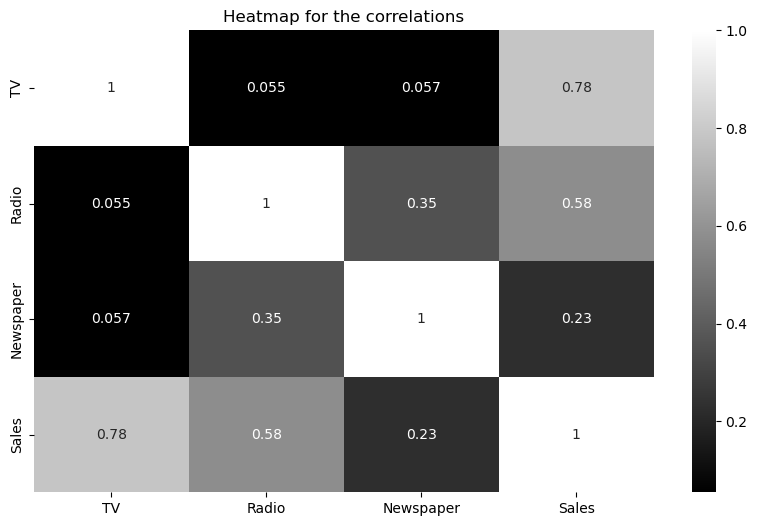

In [44]:
#heatmap
plt.figure(figsize=(10,6))
sns.heatmap(main_df.corr(),annot=True,cmap="gray")
plt.title("Heatmap for the correlations")
plt.show()

##  Darker colors are usually used to indicate low activity and brighter colors to indicate high activity.

# Spliting data into train and test data

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X = df.drop('Sales', axis=1)
y = df[["Sales"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50)

# Model Selection

In [47]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [48]:
model.fit(X_train, y_train)

LinearRegression()

In [49]:
from sklearn.metrics import mean_squared_error,r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 2.17
Root Mean Squared Error: 1.47
R-squared: 0.85
